## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [336]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [337]:
# Random state seed
rseed = 42

## Load and explore data

In [338]:
# Import the dataset
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [339]:
# Check the shape
data.shape

(167, 10)

In [340]:
# Check datatypes & counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [341]:
# Get descriptive statistics
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [342]:
# Identify any missing data
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [343]:
# Drop any non-numeric features (columns)
y = data['country']
data = data.drop(columns='country')
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: >

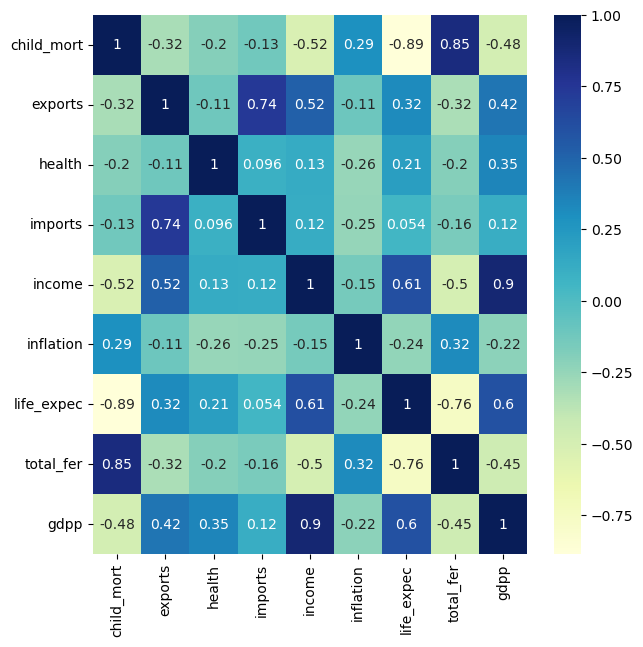

In [344]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

#### Total fertility rate vs Child mortality (0.85):

A strong positive correlation of 0.85 suggests that as the total fertility rate increases, child mortality tends to increase as well. This indicates that countries with higher fertility rates may also experience higher child mortality rates.

#### Imports vs Exports (0.74):

A strong positive correlation of 0.74 suggests that there is a strong association between imports and exports. This implies that countries that import a lot also tend to export a lot, and vice versa.

#### Income vs Exports (0.52):

A moderate positive correlation of 0.52 suggests that there is a moderate association between a country's income and its exports. This indicates that higher-income countries tend to have higher export levels, but the relationship is not as strong as in the case of imports and exports.

#### Life expectancy vs Exports (0.32):

A weak positive correlation of 0.32 suggests that there is a weak association between life expectancy and exports. This implies that countries with higher life expectancies may or may not have higher levels of exports.

#### GDPP vs Exports (0.42):

A moderate positive correlation of 0.42 suggests that there is a moderate association between a country's gross domestic product (GDP) and its exports. This indicates that countries with higher GDPs tend to have higher export levels, but the relationship is not as strong as in the case of imports and exports.

#### GDPP vs Health (0.35):

A moderate positive correlation of 0.35 suggests that there is a moderate association between a country's GDP and its health expenditure. This indicates that countries with higher GDPs tend to spend more on healthcare, but the relationship is not extremely strong.

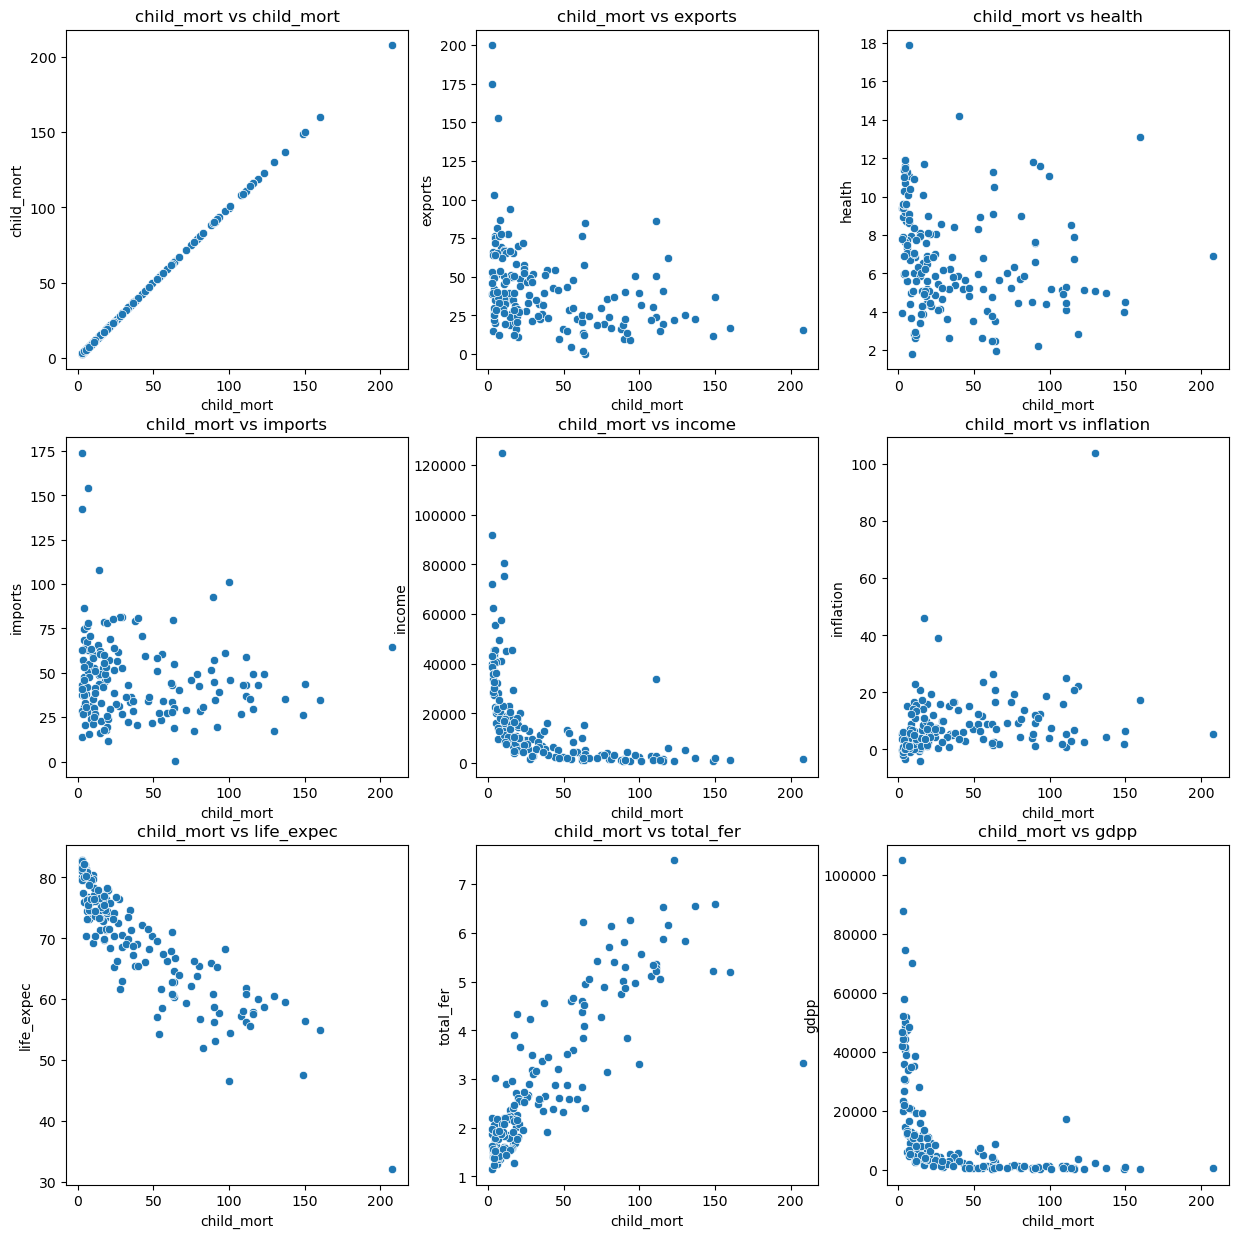

In [345]:
# Explore the continuous independent features against child_mort using scatter plots.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Loop through each subplot and create a plot
for i, ax in enumerate(axes.flat):
    if i < len(data.columns):  # Check if there are enough columns to plot
        sns.scatterplot(x=data['child_mort'], y=data.columns[i], data=data, ax=ax)
        ax.set_title(f'child_mort vs {data.columns[i]}')
    else:
        ax.set_visible(False)  # Hide any extra subplots


Total Fertility Rate vs Child Mortality seems the most promising for separating into clusters. Clustering based on these variables could potentially reveal distinct groups related to demographic and health disparities among countries.

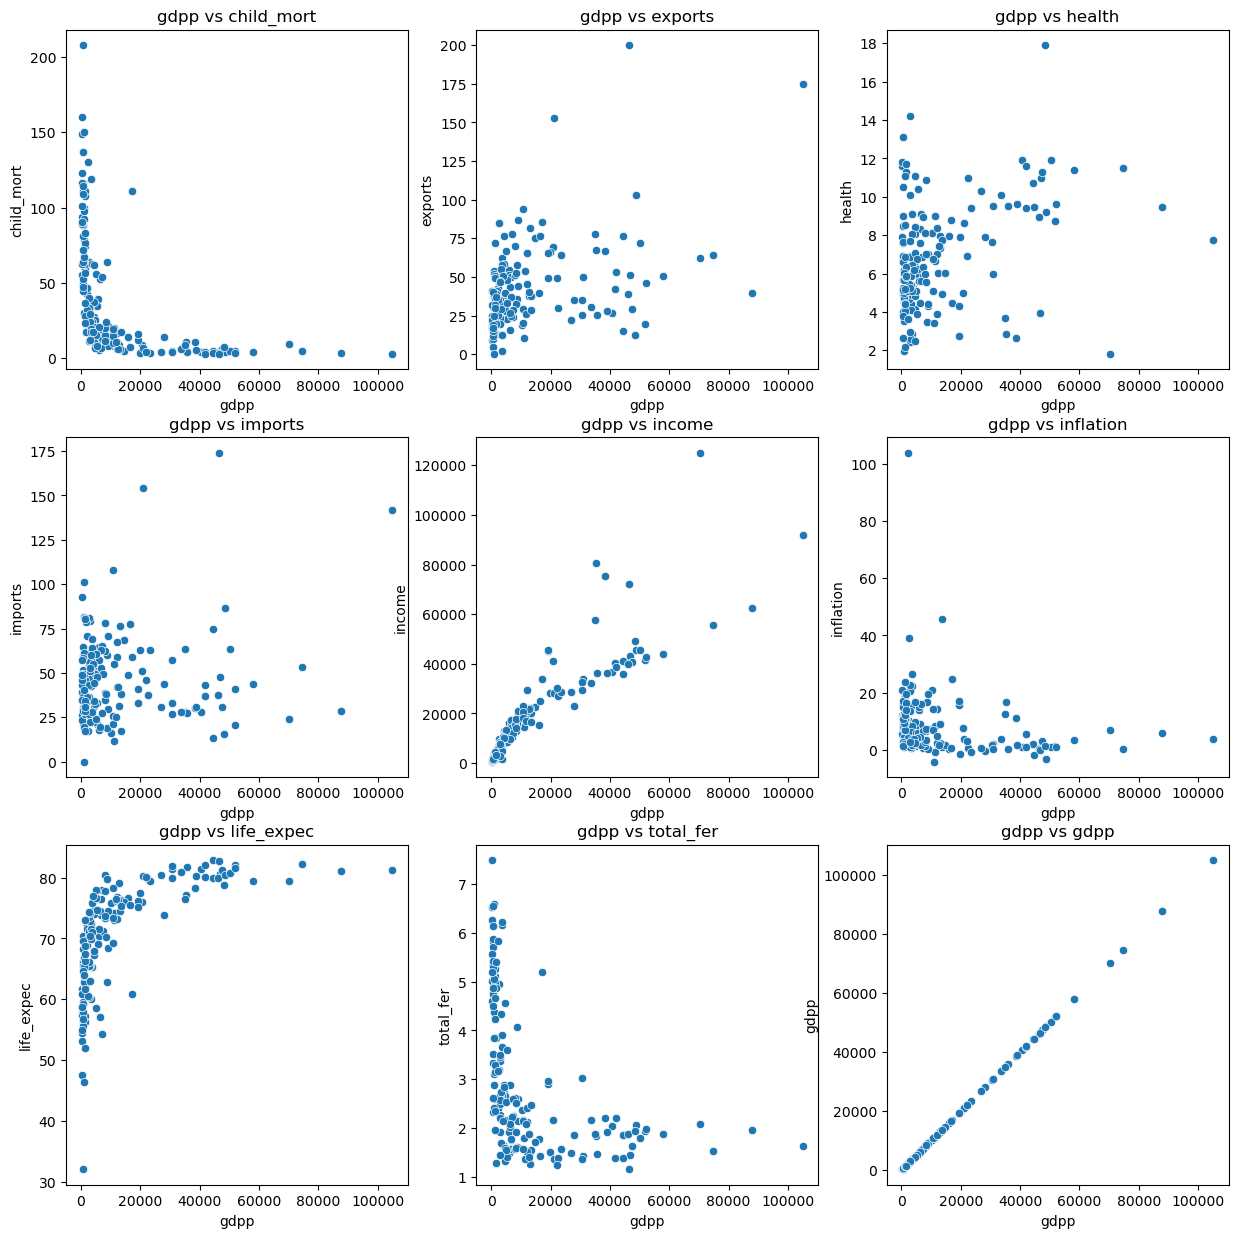

In [346]:
# Explore the continuous independent features against gdpp using scatter plots.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Loop through each subplot and create a plot
for i, ax in enumerate(axes.flat):
    if i < len(data.columns):  # Check if there are enough columns to plot
        sns.scatterplot(x=data['gdpp'], y=data.columns[i], data=data, ax=ax)
        ax.set_title(f'gdpp vs {data.columns[i]}')
    else:
        ax.set_visible(False)  # Hide any extra subplots

Gdpp vs total_fer seems the most promising for separating into clusters. Clustering based on these variables could potentially reveal distinct groups related to demographic and health disparities among countries.

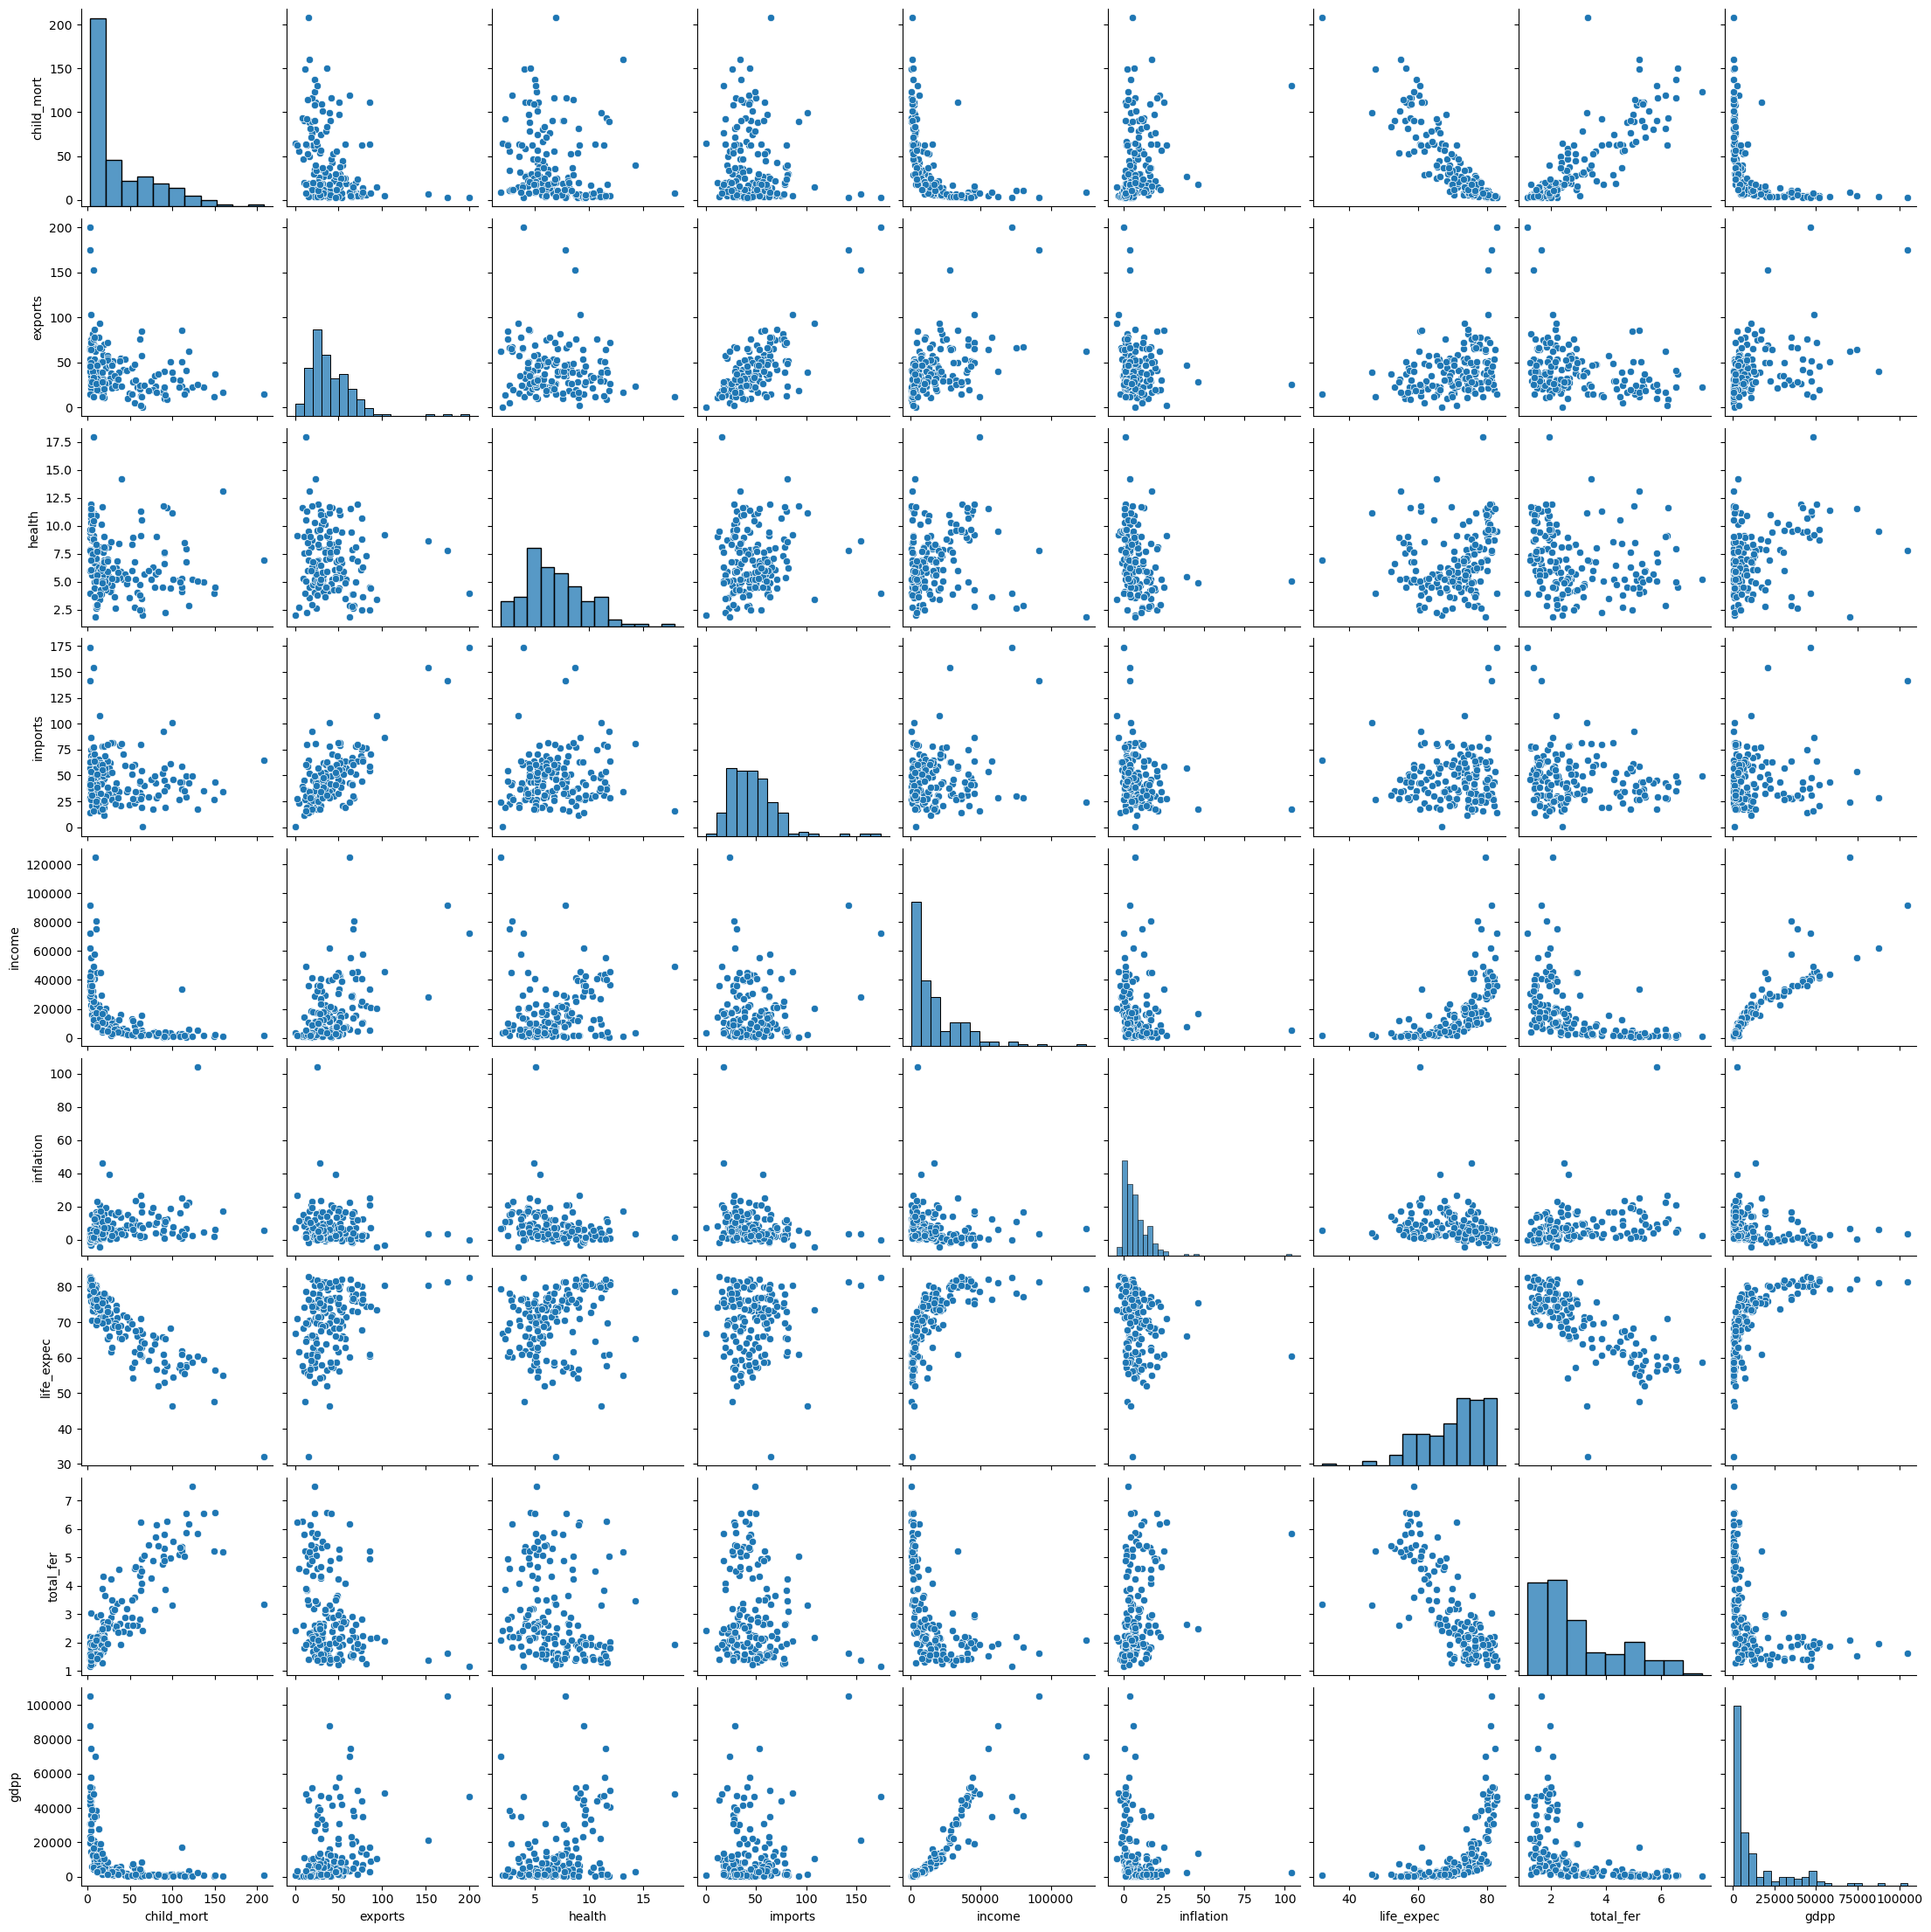

In [347]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(data)

The peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give some indication of features that would be good candidates for clustering the data.

Features with clear separation between clusters or groups in scatter plots are good candidates for clustering.
- total_fer vs imports
- total_fer vs health
- total_fer vs export
- total_fer vs life_expec

### Scaling the Data

In [348]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data)
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

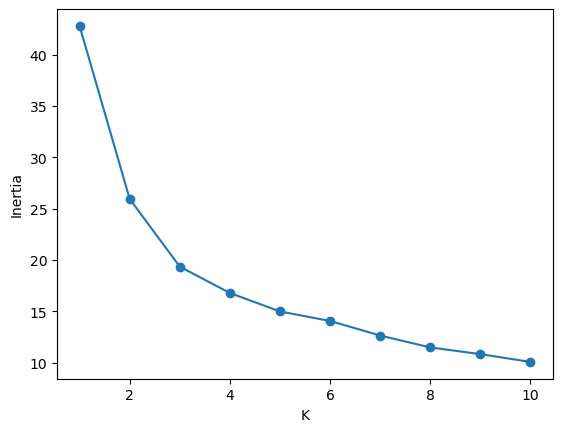

In [349]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()


# Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled)

The elbow point is around 3, 4, or 5 clusters.

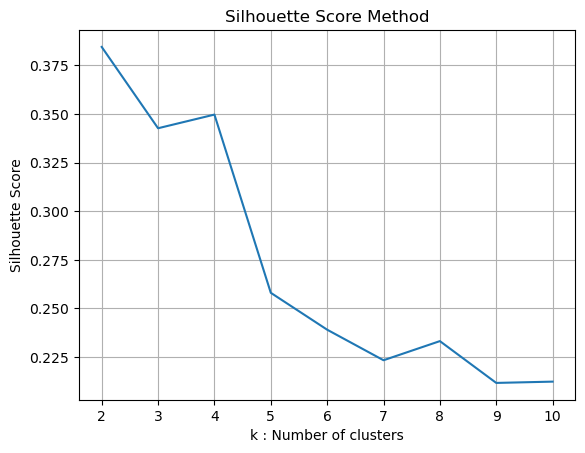

In [350]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

The silhouette method suggests that the best score is achieved with 2 clusters.

If the silhouette method suggests that the best score is achieved with 2 clusters, while the elbow method indicates possible optimal numbers around 3, 4, or 5 clusters, I need to interpret these results and decide on the appropriate number of clusters based on further visualisation.

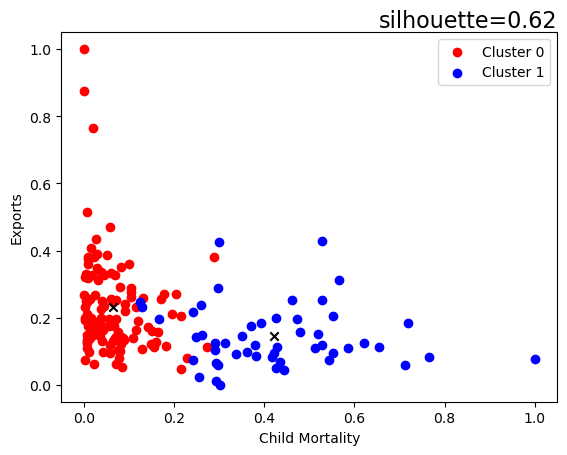

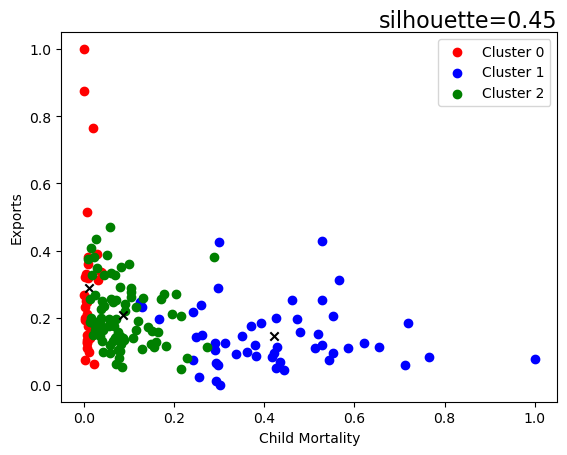

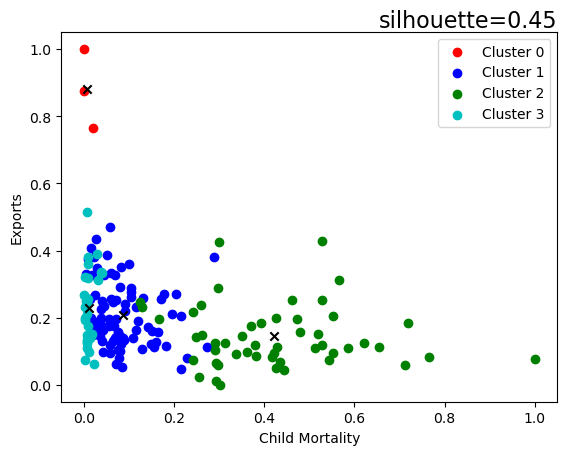

In [362]:
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=rseed)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x.values[y_pred == c, 0], x.values[y_pred == c, 1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Child Mortality')
    plt.ylabel('Exports')
    plt.legend()
    plt.show()

for k in range(2,5):
  scatter_Kmeans(df_scaled, k, r=0)

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [352]:
# Remember to set the random_state to rseed
k = 2
kmeans = KMeans(n_clusters=k, random_state=rseed)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [353]:
# Count the number of records in each cluster
df_scaled['cluster'] = labels
cluster_counts = df_scaled['cluster'].value_counts().sort_index()

print("Number of records in each cluster:")
print(cluster_counts)

Number of records in each cluster:
cluster
0    116
1     51
Name: count, dtype: int64


In [354]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: 0.623


The silhouette score of 0.623 suggests that the clusters are reasonably well-separated, with data points within clusters being closer to each other than to points in other clusters. This indicates that the clustering algorithm has successfully identified meaningful patterns in the data.

## Predictions

In [355]:
# Add the predicted cluster label column to the original dataframe
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


## Visualisation of clusters

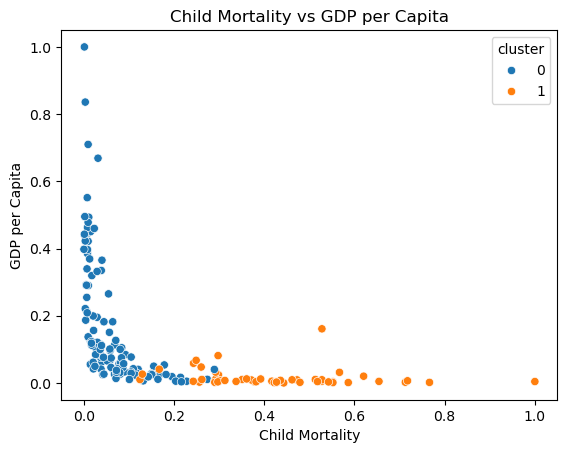

In [363]:
# Visualisation of clusters: child mortality vs gdpp
sns.scatterplot(df_scaled, x=df_scaled['child_mort'], y=df_scaled['gdpp'], hue=df_scaled['cluster'])
plt.title('Child Mortality vs GDP per Capita')
plt.xlabel('Child Mortality')
plt.ylabel('GDP per Capita')
plt.show()

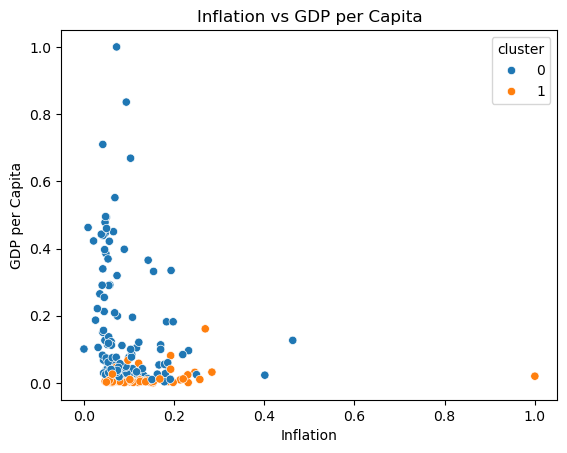

In [364]:
# Visualisation of clusters: inflation vs gdpp
sns.scatterplot(df_scaled, x=df_scaled['inflation'], y=df_scaled['gdpp'], hue=df_scaled['cluster'])
plt.title('Inflation vs GDP per Capita')
plt.xlabel('Inflation')
plt.ylabel('GDP per Capita')
plt.show()

In [358]:
# Based on the average values, we assign labels to each cluster
def assign_labels(row):
    if row['cluster'] == 0:
        return 'least developed'
    elif row['cluster'] == 1:
        return 'developed'

data['label'] = df_scaled.apply(assign_labels, axis=1)
data = pd.concat([data, y], axis=1)

In [359]:
# Display the countries with their assigned labels
data[['label', 'country']].head()

,label,country
0,developed,Afghanistan
1,least developed,Albania
2,least developed,Algeria
3,developed,Angola
4,least developed,Antigua and Barbuda


In conclusion, the clustering project aimed to group countries based on their characteristics. The K-means clustering algorithm was applied to the dataset, resulting in two distinct clusters. These clusters were labeled based on the average values of the features within each cluster, as follows:



- Least Developed:
This cluster represents countries with the highest levels of poverty and economic instability.
Characteristics include:
High child mortality rates, indicating poor healthcare and living conditions.
Low GDPP, reflecting low economic development and limited resources.
High inflation rates, suggesting economic instability and currency devaluation.

-  Developed:
This cluster represents countries with high levels of economic development and stability.
Characteristics include:
Low child mortality rates, indicating advanced healthcare and living standards.
High GDPP, reflecting strong economic growth and ample resources.
Low inflation rates, suggesting economic stability and well-managed monetary policies.




The labels assigned to each cluster are justified based on the observed characteristics of the countries within each cluster. By categorizing countries into these groups, policymakers and organizations can better understand the unique challenges and opportunities faced by different regions and tailor interventions and development strategies accordingly.